## Exercise 2

Your boss was extremely happy with your work on the housing price prediction model and decided to entrust you with a more challenging task. They've seen a lot of people leave the company recently and they would like to understand why that's happening. They have collected historical data on employees and they would like you to build a model that is able to predict which employee will leave next. The would like a model that is better than random guessing. They also prefer false negatives than false positives, in this first phase. Fields in the dataset include:

- Employee satisfaction level
- Last evaluation
- Number of projects
- Average monthly hours
- Time spent at the company
- Whether they have had a work accident
- Whether they have had a promotion in the last 5 years
- Department
- Salary
- Whether the employee has left

Your goal is to predict the binary outcome variable `left` using the rest of the data. Since the outcome is binary, this is a classification problem. Here are some things you may want to try out:

1. load the dataset at ../data/HR_comma_sep.csv, inspect it with `.head()`, `.info()` and `.describe()`.
- Establish a benchmark: what would be your accuracy score if you predicted everyone stay?
- Check if any feature needs rescaling. You may plot a histogram of the feature to decide which rescaling method is more appropriate.
- convert the categorical features into binary dummy columns. You will then have to combine them with the numerical features using `pd.concat`.
- do the usual train/test split with a 20% test size
- play around with learning rate and optimizer
- check the confusion matrix, precision and recall
- check if you still get the same results if you use a 5-Fold cross validation on all the data
- Is the model good enough for your boss?

As you will see in this exercise, the a logistic regression model is not good enough to help your boss. In the next chapter we will learn how to go beyond linear models.

This dataset comes from https://www.kaggle.com/ludobenistant/hr-analytics/ and is released under [CC BY-SA 4.0 License](https://creativecommons.org/licenses/by-sa/4.0/).

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# load the dataset at ../data/HR_comma_sep.csv, inspect it with `.head()`, `.info()` and `.describe()`.

df = pd.read_csv('../data/HR_comma_sep.csv')

In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
# Establish a benchmark: what would be your accuracy score if you predicted everyone stay?

df.left.value_counts() / len(df)

0    0.761917
1    0.238083
Name: left, dtype: float64

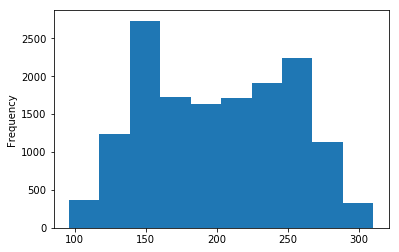

In [8]:
# Check if any feature needs rescaling
# Plot histogram of the feature to decide which rescaling method

df['average_montly_hours'].plot(kind='hist')

In [11]:
df['average_montly_hours_100'] = df['average_montly_hours']/100.0

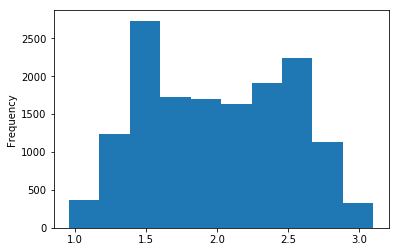

In [12]:
df['average_montly_hours_100'].plot(kind='hist')

In [14]:
# convert the categorical features into binary dummy columns.
# You will then have to combine them with
# the numerical features using `pd.concat`.
df_dummies = pd.get_dummies(df[['sales', 'salary']])

In [15]:
df_dummies.head()

,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0


In [16]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary', 'average_montly_hours_100'],
      dtype='object')

In [29]:
X = pd.concat([df[['satisfaction_level', 'last_evaluation', 'number_project', 
                   'time_spend_company', 'Work_accident', 'promotion_last_5years', 
                   'average_montly_hours_100']], df_dummies], axis=1).values
y = df['left'].values

In [30]:
X.shape

(14999, 20)

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [34]:
model = Sequential()
model.add(Dense(1, input_dim=20, activation='sigmoid'))
model.compile(Adam(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

In [35]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 21        
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.fit(X_train, y_train)

Epoch 1/10
11999/11999 [==============================] - 0s - loss: 0.5718 - acc: 0.7588     
Epoch 2/10
11999/11999 [==============================] - 0s - loss: 0.5476 - acc: 0.7618     
Epoch 3/10
11999/11999 [==============================] - 0s - loss: 0.5865 - acc: 0.7613     
Epoch 4/10
11999/11999 [==============================] - 0s - loss: 0.5157 - acc: 0.7703     
Epoch 5/10
11999/11999 [==============================] - 0s - loss: 0.5252 - acc: 0.7662     
Epoch 6/10
11999/11999 [==============================] - 0s - loss: 0.5784 - acc: 0.7612     
Epoch 7/10
11999/11999 [==============================] - 0s - loss: 0.5361 - acc: 0.7611     
Epoch 8/10
11999/11999 [==============================] - 0s - loss: 0.5599 - acc: 0.7601     
Epoch 9/10
11999/11999 [==============================] - 0s - loss: 0.5308 - acc: 0.7683     
Epoch 10/10
11999/11999 [==============================] - 0s - loss: 0.5637 - acc: 0.7628     


In [37]:
y_test_pred = model.predict_classes(X_test)

  32/3000 [..............................] - ETA: 1s

In [42]:
from sklearn.metrics import confusion_matrix, classification_report

In [43]:
def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

In [44]:
# check the confusion matrix, precision and recall

pretty_confusion_matrix(y_test, y_test_pred, labels=['Stay', 'Leave'])

,Predicted Stay,Predicted Leave
Stay,2176,117
Leave,520,187


In [45]:
print(classification_report(y_test, y_test_pred))

             precision    recall  f1-score   support

          0       0.81      0.95      0.87      2293
          1       0.62      0.26      0.37       707

avg / total       0.76      0.79      0.75      3000



In [46]:
from keras.wrappers.scikit_learn import KerasClassifier

In [47]:
# check if you still get the same results if you use a 5-Fold cross validation on all the data

def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1, input_dim=20, activation='sigmoid'))
    model.compile(Adam(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=build_logistic_regression_model,
                        epochs=10, verbose=0)

In [48]:
from sklearn.model_selection import KFold, cross_val_score

In [49]:
cv = KFold(5, shuffle=True)
scores = cross_val_score(model, X, y, cv=cv)

print("The cross validation accuracy is {:0.4f} ± {:0.4f}".format(scores.mean(), scores.std()))

The cross validation accuracy is 0.7715 ± 0.0078


In [50]:
scores

array([ 0.761     ,  0.78366667,  0.76866667,  0.77633333,  0.76792264])

In [51]:
# Is the model good enough for your boss?

No, the model is not good enough for my boss, since it performs no better than the benchmark.